## **Lab Task6**

### Problem 1 :
###  *Develop the K-Nearest Neighbors (KNN) algorithm from scratch using Python, without relying on any libraries on Cancer detection dataset.*

### Data Visualization

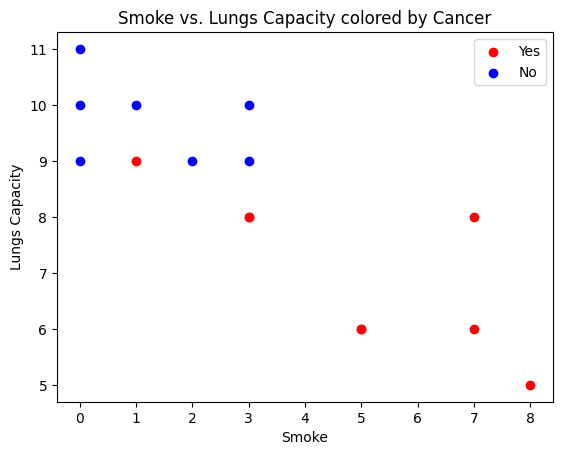

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')

X = data[['Smoke', 'Lungs Capacity']]
y = data['Cancer']

def plot_data(X, y):
    # Separate 'Yes' and 'No' instances
    X_yes = X[y == 'Yes']
    X_no = X[y == 'No']

    # Plot 'Yes' instances in red, with label 'Yes'
    plt.scatter(X_yes['Smoke'], X_yes['Lungs Capacity'], color='red', label='Yes')

    # Plot 'No' instances in blue, with label 'No'
    plt.scatter(X_no['Smoke'], X_no['Lungs Capacity'], color='blue', label='No')

    plt.xlabel('Smoke')
    plt.ylabel('Lungs Capacity')
    plt.title('Smoke vs. Lungs Capacity colored by Cancer')

    # Add a legend
    plt.legend()

    plt.show()

plot_data(X, y)



### Data Splititng

In [8]:
import numpy as np
import random

def split_data(X, y, test_size=0.2):
    # Validate test_size
    if not 0.0 <= test_size <= 1.0:
        raise ValueError("test_size must be between 0.0 and 1.0")
 
    X = X.values
    y = y.values

   # Combine 'X' and 'y' into a single list of tuples
    data = list(zip(X, y))

    # Set the seed for the random number generator to ensure every time when the code runs u get the same random numbers
    random.seed(0)

    # Shuffle the combined list of tuples 
    random.shuffle(data)

    # Split the shuffled list of tuples back into separate 'X' and 'y' lists
    X, y = zip(*data)

    # Calculate the number of instances that should be in the test set
    test_size = int(len(X) * test_size)
    print("Test size :", test_size)

    #Create the training set by taking all but the last 'test_size' elements from 'X' and 'y'
    X_train = X[:-test_size]
    y_train = y[:-test_size]

    # Create the testing set by taking the last 'test_size' elements from 'X' and 'y'
    X_test = X[-test_size:]
    y_test = y[-test_size:]

    # Print the shapes of the training and testing sets
    print(f"X_train shape: {np.array(X_train).shape}")
    print(f"y_train shape: {np.array(y_train).shape}")
    print(f"X_test shape: {np.array(X_test).shape}")
    print(f"y_test shape: {np.array(y_test).shape}")

    print("\nFirst 5 instances of X_train:")
    print(np.array(X_train)[:5])
    print("\nFirst 5 instances of y_train:")
    print(np.array(y_train)[:5])
    print("\nFirst 5 instances of X_test:")
    print(np.array(X_test)[:5])
    print("\nFirst 5 instances of y_test:")
    print(np.array(y_test)[:5])

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

X_train, X_test, y_train, y_test = split_data(X, y)


Test size : 3
X_train shape: (12, 2)
y_train shape: (12,)
X_test shape: (3, 2)
y_test shape: (3,)

First 5 instances of X_train:
[[ 0 11]
 [ 5  6]
 [ 3  9]
 [ 1  9]
 [ 5  6]]

First 5 instances of y_train:
['No' 'Yes' 'No' 'Yes' 'Yes']

First 5 instances of X_test:
[[ 7  6]
 [ 3 10]
 [ 7  8]]

First 5 instances of y_test:
['Yes' 'No' 'Yes']


### KNN implementation

In [9]:
import numpy as np
import random

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Makes predictions for the given test data.

        """
        predictions = []
        for x in X:
            prediction = self._predict(x)
            predictions.append(prediction)
        return np.array(predictions)

    def _predict(self, x):
        """
        Predicts the label for a single instance.

        """
        distances = []
        for i in range(len(self.X_train)):
            distance = self.euclidean_distance(x, self.X_train[i])
            distances.append((distance, self.y_train[i]))

        distances.sort(key=lambda x: x[0]) # as distance contain two variables the class (yes\no) and its distance so taking the distance for sorting 
        neighbors = distances[:self.k] # Select the k nearest neighbors

        classes = [neighbor[1] for neighbor in neighbors] # Extract classes from neighbors

        prediction = self.most_common(classes)
        return prediction

    def euclidean_distance(self, x1, x2):
       
        return np.sqrt(np.sum((x1 - x2)**2))

    def most_common(self, classes):
        
        class_count = {}
        for class_ in classes:
            if class_ in class_count:
                class_count[class_] += 1
            else:
                class_count[class_] = 1
        most_common_class = max(class_count, key=class_count.get)
        return most_common_class

    def accuracy(self, y_true, y_pred):
        
        correct_count = 0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                correct_count += 1
        return correct_count / len(y_true)
    
    def print_results(self, X_test, y_test, y_pred):
       
        print("Predictions:")
        for i in range(len(X_test)):
            print(f"Instance: {X_test[i]}, True: {y_test[i]}, Predicted: {y_pred[i]}")
        print(f"Accuracy: {self.accuracy(y_test, y_pred)}")



knn = KNN(k=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn.print_results(X_test,y_test, y_pred)




Predictions:
Instance: [7 6], True: Yes, Predicted: Yes
Instance: [ 3 10], True: No, Predicted: No
Instance: [7 8], True: Yes, Predicted: Yes
Accuracy: 1.0


### Problem 2 :
###  *Apply the KNN model Utilizing the fruit_data_with_colors.csv dataset.*


### Data Preprocessing

In [10]:
import pandas as pd
# Step 1: Read and Load the Data
df = pd.read_csv("fruit_data_with_colors _1_.csv")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


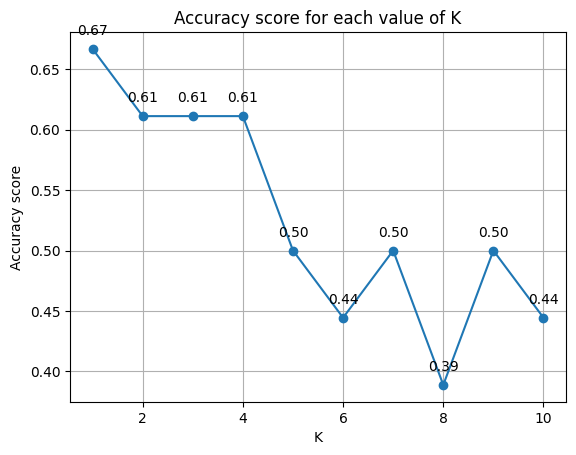

In [11]:

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Prepare the Data
df = df.drop(['fruit_name','fruit_subtype'], axis=1)

# Step 3: Address Missing Values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['fruit_label']) 
y = df_imputed['fruit_label'] 

# Step 4: Divide the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 5: Apply the KNN Model
k_values = list(range(1, 11))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Step 6: Plot the Accuracy Score
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy score')
plt.title('Accuracy score for each value of K')
plt.grid(True)

# Add text annotations for each data point
for i, accuracy in enumerate(accuracy_scores):
    plt.annotate(f'{accuracy:.2f}', (k_values[i], accuracy), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


### In this implementation of k-NN, instead of discarding the categorical columns, I encode them into numerical form. This extra step enhance the model's accuracy by utilizing all available information in the dataset.

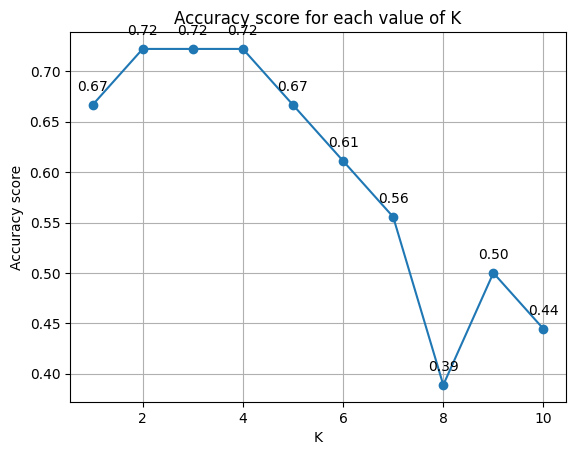

In [12]:

# Step 1: Read and Load the Data
df = pd.read_csv("fruit_data_with_colors _1_.csv")

# Step 2: Prepare the Data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fruit_name'] = le.fit_transform(df['fruit_name'])
df['fruit_subtype'] = le.fit_transform(df['fruit_subtype'])

# Step 3: Address Missing Values
# Replace missing values with the mean value of each column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['fruit_label']) # Features
y = df_imputed['fruit_label'] # Target variable

# Step 4: Divide the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 5: Apply the KNN Model
k_values = list(range(1, 11))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Step 6: Plot the Accuracy Score
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy score')
plt.title('Accuracy score for each value of K')
plt.grid(True)

# Add text annotations for each data point
for i, accuracy in enumerate(accuracy_scores):
    plt.annotate(f'{accuracy:.2f}', (k_values[i], accuracy), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


